In [275]:
#importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as st 
import warnings 
warnings.filterwarnings("ignore")

In [276]:
#read parquet format data from TLC Trip Record Data-> https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
import pyarrow.parquet as pq
table = pq.read_table(r"C:\Users\ANISH SARKAR\Downloads\yellow_tripdata_2024-01.parquet")
df = table.to_pandas()
df1=table.to_pandas()
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.90,0.0,1.0,41.50,2.5,0.00
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.00,0.0,1.0,64.95,0.0,1.75
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.00,0.0,1.0,30.40,2.5,0.00
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.00


In [277]:
df.shape

(2964624, 19)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [279]:

df["Duration(Mins)"]=df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]
df["Duration(Mins)"]=df["Duration(Mins)"].dt.total_seconds()/60
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Duration(Mins)
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00,19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00,6.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00,17.916667
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00,8.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00,6.100000
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.90,0.0,1.0,41.50,2.5,0.00,32.383333
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.00,0.0,1.0,64.95,0.0,1.75,26.050000
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.00,0.0,1.0,30.40,2.5,0.00,28.000000
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.00,28.183333
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.00,1.133333


In [280]:
df=df.drop_duplicates()
df.shape
#so there was no duplicate datas 

(2964624, 20)

In [281]:
df=df.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag","tolls_amount","Airport_fee","PULocationID","DOLocationID","extra","mta_tax","congestion_surcharge","improvement_surcharge"],axis=1)
df.head(10)


,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins)
0,2,1.0,1.72,1.0,2,17.7,0.00,22.70,19.800000
1,1,1.0,1.80,1.0,1,10.0,3.75,18.75,6.600000
2,1,1.0,4.70,1.0,1,23.3,3.00,31.30,17.916667
3,1,1.0,1.40,1.0,1,10.0,2.00,17.00,8.300000
4,1,1.0,0.80,1.0,1,7.9,3.20,16.10,6.100000
5,1,1.0,4.70,1.0,1,29.6,6.90,41.50,32.383333
6,2,2.0,10.82,1.0,1,45.7,10.00,64.95,26.050000
7,1,0.0,3.00,1.0,2,25.4,0.00,30.40,28.000000
8,2,1.0,5.44,1.0,2,31.0,0.00,36.00,28.183333
9,2,1.0,0.04,1.0,2,3.0,0.00,8.00,1.133333


In [282]:
df.drop(["VendorID","RatecodeID","tip_amount"],axis=1).describe()

,passenger_count,trip_distance,payment_type,fare_amount,total_amount,Duration(Mins)
count,2.824462e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06
mean,1.339281e+00,3.652169e+00,1.161271e+00,1.817506e+01,2.680150e+01,1.561295e+01
std,8.502817e-01,2.254626e+02,5.808686e-01,1.894955e+01,2.338558e+01,3.485105e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-8.990000e+02,-9.000000e+02,-1.356667e+01
25%,1.000000e+00,1.000000e+00,1.000000e+00,8.600000e+00,1.538000e+01,7.150000e+00
50%,1.000000e+00,1.680000e+00,1.000000e+00,1.280000e+01,2.010000e+01,1.163333e+01
75%,1.000000e+00,3.110000e+00,1.000000e+00,2.050000e+01,2.856000e+01,1.868333e+01
max,9.000000e+00,3.127223e+05,4.000000e+00,5.000000e+03,5.000000e+03,9.455400e+03


1. passenger_count : has NULL values 
2. passenger_count : std(0.8) and mean(1.3)-> has much difference thus MORE OUTLIERS present (Max=9>>>mean)
3. passenger_count : 75% cases passenger = 1 
4. trip_distance : Huge diff in std and mean (Many OUTLIERS)
5. Payment Type : Categorical Feature -> Only consider 1 and 2 (domain knowledge)
6. fare_amount : mean , std almost similar 
                 75% cases 
7. fare_amount,total_amount, Duration(Mins) has negative values-> not possible  

In [283]:
(df.isnull().sum()/len(df))*100

VendorID           0.000000
passenger_count    4.727817
trip_distance      0.000000
RatecodeID         4.727817
payment_type       0.000000
fare_amount        0.000000
tip_amount         0.000000
total_amount       0.000000
Duration(Mins)     0.000000
dtype: float64

1. around 4.7% is null values 
2. So as it is very small percentage, we can drop the rows

In [284]:
df = df.dropna()
(df.isnull().sum()/len(df))*100

VendorID           0.0
passenger_count    0.0
trip_distance      0.0
RatecodeID         0.0
payment_type       0.0
fare_amount        0.0
tip_amount         0.0
total_amount       0.0
Duration(Mins)     0.0
dtype: float64

In [285]:
df.tail(10)

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins)
2824452,2,1.0,3.50,1.0,1,19.1,4.82,28.92,17.300000
2824453,2,1.0,4.54,1.0,1,26.1,4.00,35.10,25.466667
2824454,2,1.0,17.93,2.0,1,70.0,15.15,90.90,38.000000
2824455,2,1.0,1.94,1.0,1,11.4,3.28,19.68,8.833333
2824456,2,1.0,7.68,1.0,1,31.0,7.20,43.20,14.416667
2824457,2,1.0,3.51,1.0,1,16.3,4.76,30.31,8.033333
2824458,2,1.0,3.36,1.0,1,18.4,5.85,29.25,16.516667
2824459,1,3.0,3.30,1.0,1,17.7,1.00,23.70,16.783333
2824460,1,0.0,0.40,1.0,2,5.1,0.00,10.10,3.400000
2824461,2,1.0,1.58,1.0,1,8.6,2.72,16.32,5.766667


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2824462 entries, 0 to 2824461
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VendorID         int32  
 1   passenger_count  float64
 2   trip_distance    float64
 3   RatecodeID       float64
 4   payment_type     int64  
 5   fare_amount      float64
 6   tip_amount       float64
 7   total_amount     float64
 8   Duration(Mins)   float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 204.7 MB


1. passenger_count, RatecodeID to convert to int 

In [287]:
df['passenger_count']=df['passenger_count'].astype("int64")
df['RatecodeID']=df['RatecodeID'].astype("int64")
df.tail(10)

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins)
2824452,2,1,3.50,1,1,19.1,4.82,28.92,17.300000
2824453,2,1,4.54,1,1,26.1,4.00,35.10,25.466667
2824454,2,1,17.93,2,1,70.0,15.15,90.90,38.000000
2824455,2,1,1.94,1,1,11.4,3.28,19.68,8.833333
2824456,2,1,7.68,1,1,31.0,7.20,43.20,14.416667
2824457,2,1,3.51,1,1,16.3,4.76,30.31,8.033333
2824458,2,1,3.36,1,1,18.4,5.85,29.25,16.516667
2824459,1,3,3.30,1,1,17.7,1.00,23.70,16.783333
2824460,1,0,0.40,1,2,5.1,0.00,10.10,3.400000
2824461,2,1,1.58,1,1,8.6,2.72,16.32,5.766667


In [288]:
df[df.duplicated()]

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins)
2996,2,1,2.06,1,1,12.8,3.56,21.36,11.033333
4493,2,1,2.23,1,1,14.9,3.98,23.88,14.050000
5049,2,1,0.65,1,1,6.5,2.30,13.80,4.983333
5474,2,1,0.48,1,2,5.1,0.00,10.10,2.550000
6223,2,1,2.23,1,1,15.6,4.12,24.72,14.850000
...,...,...,...,...,...,...,...,...,...
2824409,2,1,2.37,1,1,14.9,1.00,20.90,13.700000
2824413,2,1,1.77,1,1,11.4,3.28,19.68,8.900000
2824423,2,1,0.87,1,1,7.2,2.44,14.64,5.433333
2824424,2,1,0.73,1,1,6.5,0.00,11.50,5.033333


In [289]:
#duplicate values doesnt contribute in analysis 
#drop the duplicates 
df=df.drop_duplicates()
df=df.reset_index()
df.tail(10)

,index,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins)
2477444,2824452,2,1,3.50,1,1,19.1,4.82,28.92,17.300000
2477445,2824453,2,1,4.54,1,1,26.1,4.00,35.10,25.466667
2477446,2824454,2,1,17.93,2,1,70.0,15.15,90.90,38.000000
2477447,2824455,2,1,1.94,1,1,11.4,3.28,19.68,8.833333
2477448,2824456,2,1,7.68,1,1,31.0,7.20,43.20,14.416667
2477449,2824457,2,1,3.51,1,1,16.3,4.76,30.31,8.033333
2477450,2824458,2,1,3.36,1,1,18.4,5.85,29.25,16.516667
2477451,2824459,1,3,3.30,1,1,17.7,1.00,23.70,16.783333
2477452,2824460,1,0,0.40,1,2,5.1,0.00,10.10,3.400000
2477453,2824461,2,1,1.58,1,1,8.6,2.72,16.32,5.766667


In [290]:
(df['payment_type'].value_counts()/len(df))*100

1    81.604260
2    15.895230
4     1.801648
3     0.698863
Name: payment_type, dtype: float64

In [291]:
(df['passenger_count'].value_counts()/len(df))*100

1    75.106097
2    15.687516
3     3.646647
4     2.083873
5     1.345696
0     1.229125
6     0.898745
8     0.001937
7     0.000323
9     0.000040
Name: passenger_count, dtype: float64

In [292]:
# function to detect outliers using IQR method 
def outliers(data):
    outliers=[]
    data=sorted(data)
    q1,q3=np.percentile(data,[25,75])
    IQR=q3-q1
    lower=q1-(1.5*IQR)
    upper=q3+(1.5*IQR)
    for i in data:
        if(i<lower)|(i>upper):
            outliers.append(i)
    return outliers 

In [293]:

print(list(set(outliers(df['passenger_count']))))#unique values  of ouutliers 
print(list(set(outliers(df['payment_type']))))
# print(list(set(outliers_detect(df['trip_distance']))))
# print(list(set(outliers_detect(df['fare_amount']))))
# print(list(set(outliers_detect(df['Duration(Mins)']))))

[0, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 3, 4]


In [294]:
#but from domain knowledge we atleast have to take 1 , 2 (can ignore 3,4)...in case of 'payment_type'
# for 'passenger_count'  : eliminate 6, 8 , 7, 9  
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0)&(df['passenger_count']<6)]
#converting into categorical data 
df['payment_type']=df['payment_type'].replace([1,2],['Cash','Card'])
df.head()

,index,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins)
0,0,2,1,1.72,1,Card,17.7,0.00,22.70,19.800000
1,1,1,1,1.80,1,Cash,10.0,3.75,18.75,6.600000
2,2,1,1,4.70,1,Cash,23.3,3.00,31.30,17.916667
3,3,1,1,1.40,1,Cash,10.0,2.00,17.00,8.300000
4,4,1,1,0.80,1,Cash,7.9,3.20,16.10,6.100000


In [295]:
df.drop(["VendorID","RatecodeID","tip_amount"],axis=1).describe()

,index,passenger_count,trip_distance,fare_amount,total_amount,Duration(Mins)
count,2.363936e+06,2.363936e+06,2.363936e+06,2.363936e+06,2.363936e+06,2.363936e+06
mean,1.359075e+06,1.354614e+00,3.581023e+00,1.976810e+01,2.902878e+01,1.681427e+01
std,8.178949e+05,7.733840e-01,1.319240e+01,1.874554e+01,2.355068e+01,3.764745e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,-8.990000e+02,-9.000000e+02,-1.356667e+01
25%,6.434068e+05,1.000000e+00,1.100000e+00,9.300000e+00,1.610000e+01,7.800000e+00
50%,1.332862e+06,1.000000e+00,1.850000e+00,1.350000e+01,2.130000e+01,1.265000e+01
75%,2.063374e+06,1.000000e+00,3.500000e+00,2.190000e+01,3.072000e+01,2.001667e+01
max,2.824461e+06,5.000000e+00,1.540032e+04,2.221300e+03,2.225300e+03,9.455400e+03


In [296]:
#drop invalid data (negative in fare_amount,total_amount,Duration(Mins))
df=df[df["fare_amount"]>0]
df=df[df["trip_distance"]>0]
df=df[df["total_amount"]>0]
df=df[df["Duration(Mins)"]>0]
df.describe()

,index,VendorID,passenger_count,trip_distance,RatecodeID,fare_amount,tip_amount,total_amount,Duration(Mins)
count,2.333021e+06,2.333021e+06,2.333021e+06,2.333021e+06,2.333021e+06,2.333021e+06,2.333021e+06,2.333021e+06,2.333021e+06
mean,1.359676e+06,1.770281e+00,1.354302e+00,3.616082e+00,2.197606e+00,1.975718e+01,3.674741e+00,2.907369e+01,1.688110e+01
std,8.176851e+05,4.206521e-01,7.732946e-01,1.327030e+01,1.046508e+01,1.814976e+01,4.073781e+00,2.296356e+01,3.759630e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e-02,0.000000e+00,1.010000e+00,1.666667e-02
25%,6.443300e+05,2.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,9.300000e+00,1.000000e+00,1.617000e+01,7.883333e+00
50%,1.333882e+06,2.000000e+00,1.000000e+00,1.880000e+00,1.000000e+00,1.350000e+01,2.980000e+00,2.130000e+01,1.270000e+01
75%,2.063836e+06,2.000000e+00,1.000000e+00,3.530000e+00,1.000000e+00,2.190000e+01,4.550000e+00,3.062000e+01,2.005000e+01
max,2.824461e+06,2.000000e+00,5.000000e+00,1.540032e+04,9.900000e+01,2.221300e+03,4.227000e+02,2.225300e+03,9.455400e+03


In [297]:
(df["RatecodeID"].value_counts()/len(df))*100
# RatecodeID seems not playing an important role as 94% is 1 (Standard Rate)
# so filter out other RatecodeID 

1     94.034387
2      3.910852
99     1.153912
5      0.357219
3      0.293482
4      0.250105
6      0.000043
Name: RatecodeID, dtype: float64

In [298]:
df=df[df["RatecodeID"]==1]

In [299]:
(df["VendorID"].value_counts()/len(df))*100
#lets leave VendorID for now 

2    77.678839
1    22.321161
Name: VendorID, dtype: float64

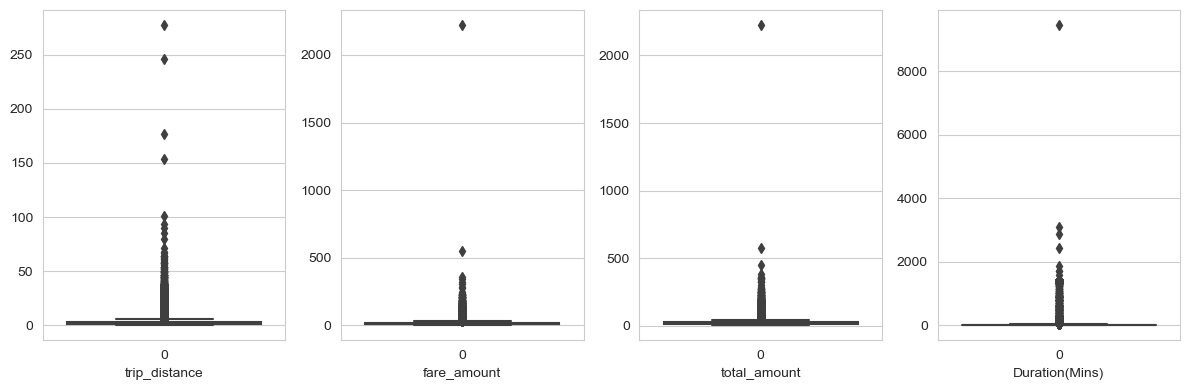

In [300]:
#visualize the outliers 
fig, axes = plt.subplots(nrows=1, ncols=len(["trip_distance","fare_amount","total_amount","Duration(Mins)"]), figsize=(12, 4))
for i, column in enumerate(["trip_distance","fare_amount","total_amount","Duration(Mins)"]):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()

In [301]:
#handling outliers 
def remove_outliers(df,column):
    q1,q3=np.percentile(df[column],[25,75])
    IQR=q3-q1
    lower=q1-(1.5*IQR)
    upper=q3+(1.5*IQR)
    return df[(df[column] >= lower) & (df[column] <= upper)]
for i in ["tip_amount","trip_distance","fare_amount","total_amount","Duration(Mins)"]:
    df = remove_outliers(df,i)

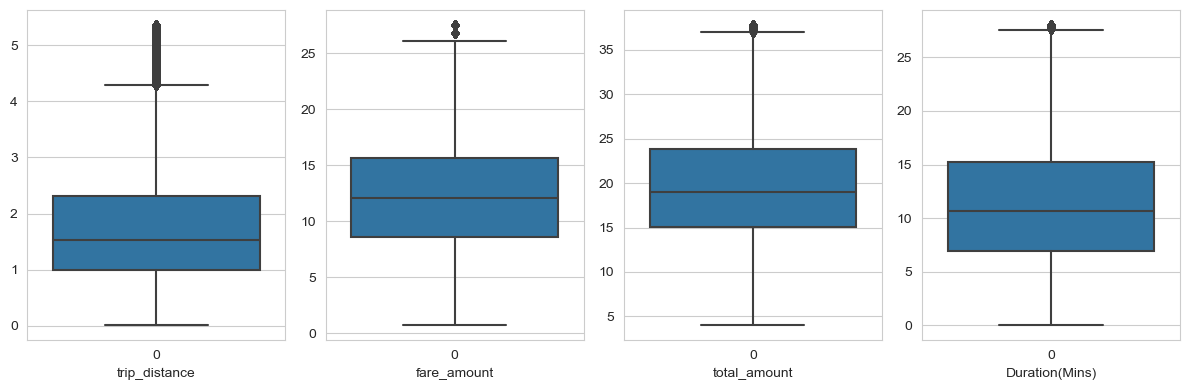

In [302]:
fig, axes = plt.subplots(nrows=1, ncols=len(["trip_distance","fare_amount","total_amount","Duration(Mins)"]), figsize=(12,4))
for i, column in enumerate(["trip_distance","fare_amount","total_amount","Duration(Mins)"]):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()

In [303]:
df.describe()
df_buffer=df.copy()

#  Analysis

In [304]:
df=df_buffer.copy()
df.head(10)

,index,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins)
0,0,2,1,1.72,1,Card,17.7,0.00,22.70,19.800000
1,1,1,1,1.80,1,Cash,10.0,3.75,18.75,6.600000
2,2,1,1,4.70,1,Cash,23.3,3.00,31.30,17.916667
3,3,1,1,1.40,1,Cash,10.0,2.00,17.00,8.300000
4,4,1,1,0.80,1,Cash,7.9,3.20,16.10,6.100000
9,9,2,1,0.04,1,Card,3.0,0.00,8.00,1.133333
10,10,2,2,0.75,1,Cash,7.9,0.00,12.90,6.316667
11,11,1,2,1.20,1,Cash,14.9,3.95,23.85,9.050000
13,13,1,2,0.40,1,Cash,5.8,1.25,12.05,3.733333
14,14,1,1,0.80,1,Card,6.5,0.00,11.50,3.833333


### Understanding the Data

In [305]:
df.groupby("payment_type").agg({'fare_amount': ["mean", "std"], 'trip_distance': ["mean", "std"], 'total_amount': ["mean", "std"]})

fare_amount           trip_distance           total_amount  \
                    mean       std          mean       std         mean   
payment_type                                                              
Card           12.156633  5.117397      1.675001  1.062092    16.774911   
Cash           12.651049  5.056242      1.784076  1.029082    20.522621   

                        
                   std  
payment_type            
Card          5.300345  
Cash          6.147520

----from here we got to know that when  using Cash , the total amount and trip distance is more 
 so when are the people using Card ? 

Text(0, 0.5, 'Count')

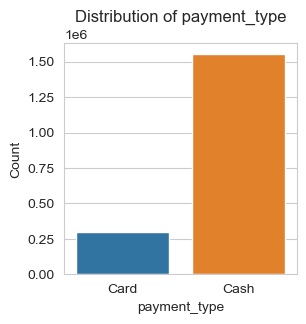

In [306]:

plt.figure(figsize=(3, 3))
sns.countplot(data=df, x="payment_type")
plt.title('Distribution of payment_type')
plt.xlabel('payment_type')
plt.ylabel('Count')

In [307]:
(df['payment_type'].value_counts())/len(df)*100

Cash    83.993265
Card    16.006735
Name: payment_type, dtype: float64

1. -----16% passengers use Card 

Text(0, 0.5, 'Count')

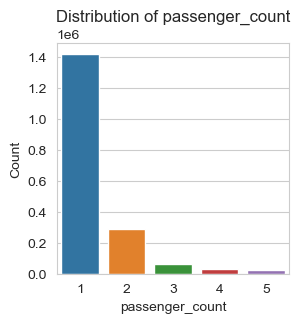

In [308]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x="passenger_count")
plt.title('Distribution of passenger_count')
plt.xlabel('passenger_count')
plt.ylabel('Count')

In [309]:
(df['passenger_count'].value_counts())/len(df)*100

1    76.846166
2    15.882593
3     3.748772
4     2.024704
5     1.497765
Name: passenger_count, dtype: float64

-------76% times only 1 passenger travel other 15% by only 2 passengers 

<Axes: xlabel='trip_distance', ylabel='Count'>

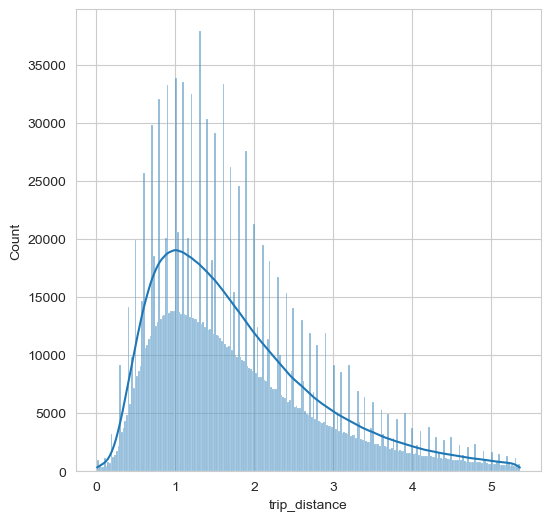

In [310]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
sns.histplot(data=df, x="trip_distance", kde=True)

------most passengers travel around 0.5-2 km

<Axes: xlabel='Duration(Mins)', ylabel='Count'>

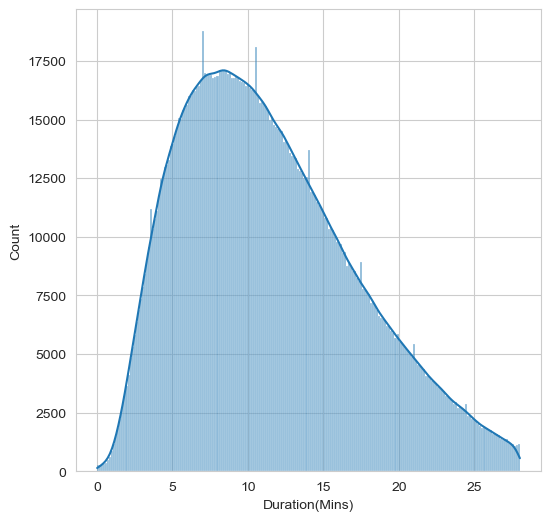

In [311]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
sns.histplot(data=df, x="Duration(Mins)", kde=True)

----Most passenger travel for 5-15 mins 

Text(0, 0.5, 'Total Amount')

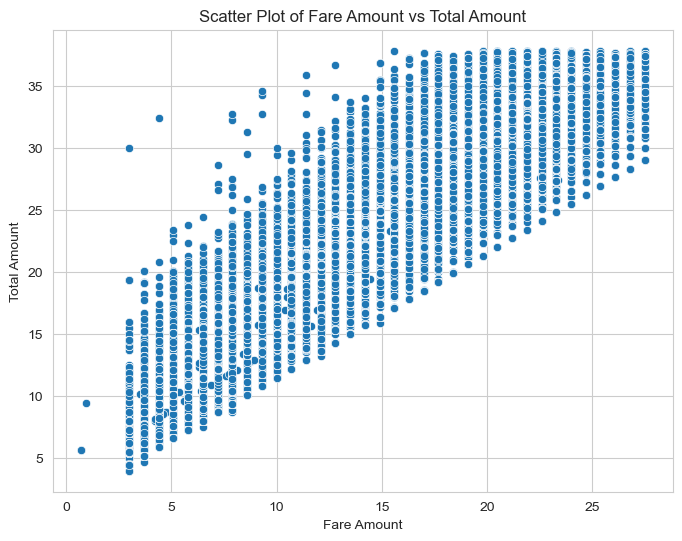

In [312]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="fare_amount", y="total_amount")
plt.title('Scatter Plot of Fare Amount vs Total Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Total Amount')

In [313]:
df['fare_amount'].corr(df['total_amount'])

0.943289199721558

-----fare amount and total amount has high positive correlation(0.943) . 

### Univariate, Bivariate, Numerical Analysis

In [314]:
#here trip_distance is a continuous data 
# convert it into bins 
print(df["trip_distance"].max())
print(df["trip_distance"].min())
print(df["trip_distance"].median())

5.36
0.01
1.53


In [315]:
labels=["{0}-{1}".format(round(i,2),round(i+0.535,2)) for i in np.arange(0.01,5.3, 0.535)]
print(labels)
df["trip_grouped"]=pd.cut(df.trip_distance,np.arange(0.01, 5.37,0.535),labels=labels ) #bins created 

['0.01-0.55', '0.55-1.08', '1.08-1.62', '1.62-2.15', '2.15-2.68', '2.68-3.22', '3.22-3.76', '3.76-4.29', '4.29-4.82', '4.82-5.36']


In [316]:
df[df["trip_grouped"].isnull()]

,index,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins),trip_grouped
3846,3847,2,4,0.01,1,Card,4.4,0.0,9.40,4.550000,NaN
4895,4897,2,2,0.01,1,Cash,5.1,0.0,10.10,3.083333,NaN
9417,9427,2,1,0.01,1,Card,3.0,0.0,8.00,0.316667,NaN
9734,9745,2,2,0.01,1,Card,4.4,0.0,9.40,2.666667,NaN
12194,12206,2,4,0.01,1,Card,3.7,0.0,8.70,1.433333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2448484,2789634,2,1,0.01,1,Card,3.0,0.0,9.50,0.950000,NaN
2452874,2794899,2,1,0.01,1,Card,3.0,0.0,9.50,0.333333,NaN
2454838,2797252,2,2,0.01,1,Card,3.0,0.0,7.00,0.050000,NaN
2455893,2798530,2,5,0.01,1,Card,3.0,0.0,9.50,0.133333,NaN


In [317]:
trip_null_df=df[df["trip_grouped"].isnull()].trip_distance
trip_null_df.describe()
#thus all NULL values in trip_grouped represents the trip_distance=0.01

count    4.030000e+02
mean     1.000000e-02
std      1.024759e-16
min      1.000000e-02
25%      1.000000e-02
50%      1.000000e-02
75%      1.000000e-02
max      1.000000e-02
Name: trip_distance, dtype: float64

In [318]:
#replace all NaN values with 0.01
if df["trip_grouped"].isnull().any():
    df["trip_grouped"] = df["trip_grouped"].astype('category')
    df["trip_grouped"] = df["trip_grouped"].cat.add_categories('0.01')
    df["trip_grouped"].fillna('0.01', inplace=True)

In [319]:
trip_null_df=df[df["trip_grouped"].isnull()].trip_distance
trip_null_df.describe()
#no null values now 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: trip_distance, dtype: float64

In [320]:
#drop trip_distance 
df=df.drop(columns=["trip_distance","RatecodeID"],axis=1)
df.head(10)

,index,VendorID,passenger_count,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins),trip_grouped
0,0,2,1,Card,17.7,0.00,22.70,19.800000,1.62-2.15
1,1,1,1,Cash,10.0,3.75,18.75,6.600000,1.62-2.15
2,2,1,1,Cash,23.3,3.00,31.30,17.916667,4.29-4.82
3,3,1,1,Cash,10.0,2.00,17.00,8.300000,1.08-1.62
4,4,1,1,Cash,7.9,3.20,16.10,6.100000,0.55-1.08
9,9,2,1,Card,3.0,0.00,8.00,1.133333,0.01-0.55
10,10,2,2,Cash,7.9,0.00,12.90,6.316667,0.55-1.08
11,11,1,2,Cash,14.9,3.95,23.85,9.050000,1.08-1.62
13,13,1,2,Cash,5.8,1.25,12.05,3.733333,0.01-0.55
14,14,1,1,Card,6.5,0.00,11.50,3.833333,0.55-1.08


In [321]:
print(df["total_amount"].max())
print(df["total_amount"].min())
print(df["total_amount"].median())


37.8
4.0
18.96


In [322]:
labels=["{0}-{1}".format(round(i,2),round(i+3.38,2)) for i in np.arange(4.0,37.8,3.38)]
print(labels)
df["total_amount_grouped"]=pd.cut(df.total_amount,np.arange(4.0,37.9,3.38),labels=labels ) #bins created 

['4.0-7.38', '7.38-10.76', '10.76-14.14', '14.14-17.52', '17.52-20.9', '20.9-24.28', '24.28-27.66', '27.66-31.04', '31.04-34.42', '34.42-37.8']


In [323]:
df.head()

,index,VendorID,passenger_count,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins),trip_grouped,total_amount_grouped
0,0,2,1,Card,17.7,0.00,22.70,19.800000,1.62-2.15,20.9-24.28
1,1,1,1,Cash,10.0,3.75,18.75,6.600000,1.62-2.15,17.52-20.9
2,2,1,1,Cash,23.3,3.00,31.30,17.916667,4.29-4.82,31.04-34.42
3,3,1,1,Cash,10.0,2.00,17.00,8.300000,1.08-1.62,14.14-17.52
4,4,1,1,Cash,7.9,3.20,16.10,6.100000,0.55-1.08,14.14-17.52


In [324]:
#here fare_amount is a continuous data 
# convert it into bins 
print(df["fare_amount"].max())
print(df["fare_amount"].min())
print(df["fare_amount"].median())


27.5
0.7
12.1


In [325]:
labels=["{0}-{1}".format(round(i,1),round(i+2.68,1)) for i in np.arange(0.7,27.5,2.68)]
print(labels)
df["fare_amount_grouped"]=pd.cut(df.fare_amount,np.arange(0.7, 29.7,2.68),labels=labels ) #bins created 

['0.7-3.4', '3.4-6.1', '6.1-8.7', '8.7-11.4', '11.4-14.1', '14.1-16.8', '16.8-19.5', '19.5-22.1', '22.1-24.8', '24.8-27.5']


In [326]:
df.head(10)

,index,VendorID,passenger_count,payment_type,fare_amount,tip_amount,total_amount,Duration(Mins),trip_grouped,total_amount_grouped,fare_amount_grouped
0,0,2,1,Card,17.7,0.00,22.70,19.800000,1.62-2.15,20.9-24.28,16.8-19.5
1,1,1,1,Cash,10.0,3.75,18.75,6.600000,1.62-2.15,17.52-20.9,8.7-11.4
2,2,1,1,Cash,23.3,3.00,31.30,17.916667,4.29-4.82,31.04-34.42,22.1-24.8
3,3,1,1,Cash,10.0,2.00,17.00,8.300000,1.08-1.62,14.14-17.52,8.7-11.4
4,4,1,1,Cash,7.9,3.20,16.10,6.100000,0.55-1.08,14.14-17.52,6.1-8.7
9,9,2,1,Card,3.0,0.00,8.00,1.133333,0.01-0.55,7.38-10.76,0.7-3.4
10,10,2,2,Cash,7.9,0.00,12.90,6.316667,0.55-1.08,10.76-14.14,6.1-8.7
11,11,1,2,Cash,14.9,3.95,23.85,9.050000,1.08-1.62,20.9-24.28,14.1-16.8
13,13,1,2,Cash,5.8,1.25,12.05,3.733333,0.01-0.55,10.76-14.14,3.4-6.1
14,14,1,1,Card,6.5,0.00,11.50,3.833333,0.55-1.08,10.76-14.14,6.1-8.7


In [327]:
print(df["Duration(Mins)"].max())
print(df["Duration(Mins)"].min())
print(df["Duration(Mins)"].median())

28.016666666666666
0.016666666666666666
10.65


In [328]:
labels=["{0}-{1}".format(round(i,2),round(i+2,2)) for i in np.arange(0.016,28.016,2)]
print(labels)
df["Duration(Mins)_grouped"]=pd.cut(df["Duration(Mins)"],np.arange(0.016,28.5,2),labels=labels ) 

['0.02-2.02', '2.02-4.02', '4.02-6.02', '6.02-8.02', '8.02-10.02', '10.02-12.02', '12.02-14.02', '14.02-16.02', '16.02-18.02', '18.02-20.02', '20.02-22.02', '22.02-24.02', '24.02-26.02', '26.02-28.02']


In [329]:
df=df.drop(columns=["Duration(Mins)","fare_amount"])
df.head(10)

,index,VendorID,passenger_count,payment_type,tip_amount,total_amount,trip_grouped,total_amount_grouped,fare_amount_grouped,Duration(Mins)_grouped
0,0,2,1,Card,0.00,22.70,1.62-2.15,20.9-24.28,16.8-19.5,18.02-20.02
1,1,1,1,Cash,3.75,18.75,1.62-2.15,17.52-20.9,8.7-11.4,6.02-8.02
2,2,1,1,Cash,3.00,31.30,4.29-4.82,31.04-34.42,22.1-24.8,16.02-18.02
3,3,1,1,Cash,2.00,17.00,1.08-1.62,14.14-17.52,8.7-11.4,8.02-10.02
4,4,1,1,Cash,3.20,16.10,0.55-1.08,14.14-17.52,6.1-8.7,6.02-8.02
9,9,2,1,Card,0.00,8.00,0.01-0.55,7.38-10.76,0.7-3.4,0.02-2.02
10,10,2,2,Cash,0.00,12.90,0.55-1.08,10.76-14.14,6.1-8.7,6.02-8.02
11,11,1,2,Cash,3.95,23.85,1.08-1.62,20.9-24.28,14.1-16.8,8.02-10.02
13,13,1,2,Cash,1.25,12.05,0.01-0.55,10.76-14.14,3.4-6.1,2.02-4.02
14,14,1,1,Card,0.00,11.50,0.55-1.08,10.76-14.14,6.1-8.7,2.02-4.02


In [330]:
print(df["tip_amount"].max())
print(df["tip_amount"].min())
print(df["tip_amount"].median())

9.17
0.0
2.7


In [331]:
labels=["{0}-{1}".format(round(i,2),round(i+0.917,2)) for i in np.arange(0.00,9.17,0.917)]
print(labels)
df["tip_amount_grouped"]=pd.cut(df["tip_amount"],np.arange(0.00,9.18,0.917),labels=labels ) 

['0.0-0.92', '0.92-1.83', '1.83-2.75', '2.75-3.67', '3.67-4.58', '4.58-5.5', '5.5-6.42', '6.42-7.34', '7.34-8.25', '8.25-9.17']


In [332]:
df[df["tip_amount_grouped"].isnull()]

,index,VendorID,passenger_count,payment_type,tip_amount,total_amount,trip_grouped,total_amount_grouped,fare_amount_grouped,Duration(Mins)_grouped,tip_amount_grouped
0,0,2,1,Card,0.0,22.70,1.62-2.15,20.9-24.28,16.8-19.5,18.02-20.02,NaN
9,9,2,1,Card,0.0,8.00,0.01-0.55,7.38-10.76,0.7-3.4,0.02-2.02,NaN
10,10,2,2,Cash,0.0,12.90,0.55-1.08,10.76-14.14,6.1-8.7,6.02-8.02,NaN
14,14,1,1,Card,0.0,11.50,0.55-1.08,10.76-14.14,6.1-8.7,2.02-4.02,NaN
15,15,1,1,Card,0.0,25.45,4.82-5.36,24.28-27.66,19.5-22.1,12.02-14.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2477417,2824422,2,1,Card,0.0,19.20,2.15-2.68,17.52-20.9,14.1-16.8,12.02-14.02,NaN
2477421,2824428,2,1,Card,0.0,23.40,2.15-2.68,20.9-24.28,16.8-19.5,16.02-18.02,NaN
2477437,2824444,1,2,Card,0.0,15.00,1.08-1.62,14.14-17.52,8.7-11.4,10.02-12.02,NaN
2477440,2824447,1,1,Cash,0.0,15.70,1.08-1.62,14.14-17.52,8.7-11.4,8.02-10.02,NaN


In [333]:
tip_null_df=df[df["tip_amount_grouped"].isnull()].tip_amount
tip_null_df.describe()
#so all null values bcause of 0 
#  Create another category 0

count    353553.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: tip_amount, dtype: float64

In [334]:
if df["tip_amount_grouped"].isnull().any():
    df["tip_amount_grouped"] = df["tip_amount_grouped"].astype('category')
    df["tip_amount_grouped"] = df["tip_amount_grouped"].cat.add_categories('0')
    df["tip_amount_grouped"].fillna('0', inplace=True)

In [335]:
df=df.drop(columns=["tip_amount","index"])
df.tail(10)

,VendorID,passenger_count,payment_type,total_amount,trip_grouped,total_amount_grouped,fare_amount_grouped,Duration(Mins)_grouped,tip_amount_grouped
2477440,1,1,Cash,15.70,1.08-1.62,14.14-17.52,8.7-11.4,8.02-10.02,0
2477442,2,1,Cash,18.00,1.08-1.62,17.52-20.9,8.7-11.4,8.02-10.02,2.75-3.67
2477443,2,1,Card,9.40,0.01-0.55,7.38-10.76,3.4-6.1,2.02-4.02,0
2477444,2,1,Cash,28.92,3.22-3.76,27.66-31.04,16.8-19.5,16.02-18.02,4.58-5.5
2477445,2,1,Cash,35.10,4.29-4.82,34.42-37.8,24.8-27.5,24.02-26.02,3.67-4.58
2477447,2,1,Cash,19.68,1.62-2.15,17.52-20.9,8.7-11.4,8.02-10.02,2.75-3.67
2477449,2,1,Cash,30.31,3.22-3.76,27.66-31.04,14.1-16.8,8.02-10.02,4.58-5.5
2477450,2,1,Cash,29.25,3.22-3.76,27.66-31.04,16.8-19.5,16.02-18.02,5.5-6.42
2477451,1,3,Cash,23.70,3.22-3.76,20.9-24.28,16.8-19.5,16.02-18.02,0.92-1.83
2477453,2,1,Cash,16.32,1.08-1.62,14.14-17.52,6.1-8.7,4.02-6.02,1.83-2.75


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847085 entries, 0 to 2477453
Data columns (total 9 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   VendorID                int32   
 1   passenger_count         int64   
 2   payment_type            object  
 3   total_amount            float64 
 4   trip_grouped            category
 5   total_amount_grouped    category
 6   fare_amount_grouped     category
 7   Duration(Mins)_grouped  category
 8   tip_amount_grouped      category
dtypes: category(5), float64(1), int32(1), int64(1), object(1)
memory usage: 72.2+ MB


In [337]:
df["tip_amount_grouped"] = pd.Categorical(df["tip_amount_grouped"])
df["trip_grouped"] = pd.Categorical(df["trip_grouped"])
df["passenger_count"] = pd.Categorical(df["passenger_count"])
df["VendorID"] = pd.Categorical(df["VendorID"])

<Axes: xlabel='VendorID', ylabel='count'>

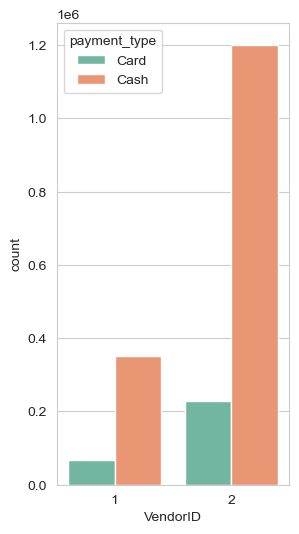

In [338]:
#here the target variable is payment_type 
sns.set_style("whitegrid")
plt.figure(figsize=(3,6))
sns.countplot(data=df,x="VendorID",hue="payment_type", palette="Set2")

In [339]:
cross_tab = pd.crosstab(df['VendorID'], df['payment_type'], margins=True)
cross_tab["%Cash"]=cross_tab["Cash"]/cross_tab["All"]
print(cross_tab)


payment_type    Card     Cash      All     %Cash
VendorID                                        
1              67885   350332   418217  0.837680
2             227773  1201095  1428868  0.840592
All           295658  1551427  1847085  0.839933


1. Vendor 2 Vendor 1 almost has almost same cash % (84%)
2. Vendor 1 is operating in small scale
3. vendorID not a variable 

<Axes: xlabel='passenger_count', ylabel='count'>

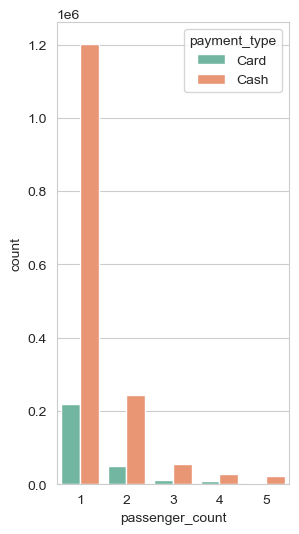

In [340]:
sns.set_style("whitegrid")
plt.figure(figsize=(3,6))
sns.countplot(data=df,x="passenger_count",hue="payment_type", palette="Set2")

In [341]:
cross_tab = pd.crosstab(df['passenger_count'], df['payment_type'], margins=True)
cross_tab["%Cash"]=cross_tab["Cash"]/cross_tab["All"]
print(cross_tab)


payment_type       Card     Cash      All     %Cash
passenger_count                                    
1                218818  1200596  1419414  0.845839
2                 50487   242878   293365  0.827904
3                 12718    56525    69243  0.816328
4                  9096    28302    37398  0.756778
5                  4539    23126    27665  0.835930
All              295658  1551427  1847085  0.839933


1. Mostly 1 passenger travel (84%cash percentage...so single passenger generally use Cash) 
2. If 3,4 passengers travel then around 80% using cash which is a litter < than 1 passenger ....groups pay using Card

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.01-0.55'),
  Text(1, 0, '0.55-1.08'),
  Text(2, 0, '1.08-1.62'),
  Text(3, 0, '1.62-2.15'),
  Text(4, 0, '2.15-2.68'),
  Text(5, 0, '2.68-3.22'),
  Text(6, 0, '3.22-3.76'),
  Text(7, 0, '3.76-4.29'),
  Text(8, 0, '4.29-4.82'),
  Text(9, 0, '4.82-5.36'),
  Text(10, 0, '0.01')])

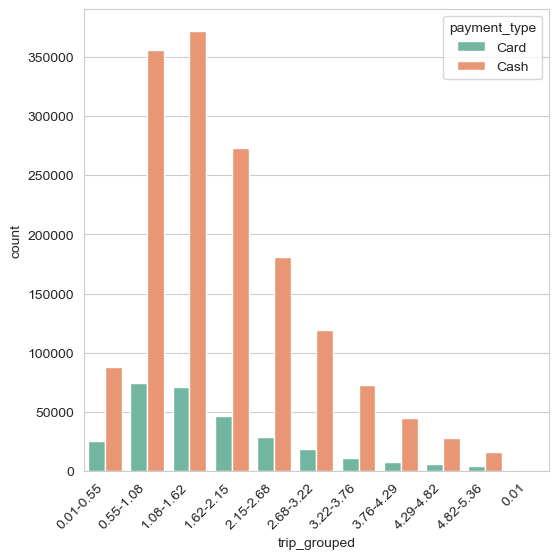

In [342]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="trip_grouped",hue="payment_type", palette="Set2")
plt.xticks(rotation=45, ha='right')

In [343]:
cross_tab = pd.crosstab(df['trip_grouped'], df['payment_type'], margins=True)
cross_tab["%Cash"]=cross_tab["Cash"]/cross_tab["All"]
print(cross_tab)

payment_type    Card     Cash      All     %Cash
trip_grouped                                    
0.01-0.55      25842    88284   114126  0.773566
0.55-1.08      74876   355595   430471  0.826060
1.08-1.62      71214   371614   442828  0.839184
1.62-2.15      46963   273051   320014  0.853247
2.15-2.68      28739   180985   209724  0.862968
2.68-3.22      18752   119139   137891  0.864009
3.22-3.76      11487    72912    84399  0.863896
3.76-4.29       7516    45143    52659  0.857270
4.29-4.82       5848    28334    34182  0.828916
4.82-5.36       4093    16295    20388  0.799245
0.01             328       75      403  0.186104
All           295658  1551427  1847085  0.839933


1. Normally for very short distance(below 1), Card used (Cash Not used)....(so no to Short distance journeys) 
2. Mostly Cash is used for distances 2-4km

Text(0.5, 1.0, 'Distribution of Fare Amount Grouped by Payment Type')

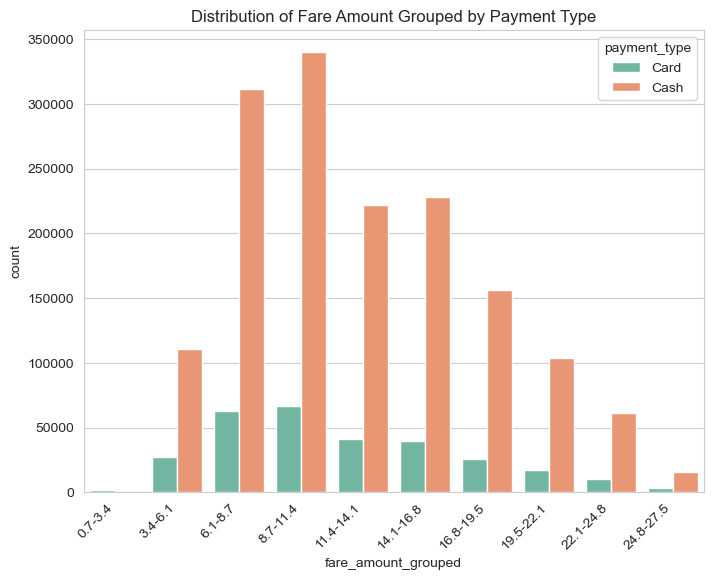

In [344]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="fare_amount_grouped",hue="payment_type",palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Fare Amount Grouped by Payment Type')

In [345]:
cross_tab = pd.crosstab(df['fare_amount_grouped'], df['payment_type'], margins=True)
# cross_tab["%Card"]=cross_tab["Card"]/cross_tab["All"]
cross_tab["%Cash"]=cross_tab["Cash"]/cross_tab["All"]
print(cross_tab)

payment_type           Card     Cash      All     %Cash
fare_amount_grouped                                    
0.7-3.4                1473      538     2011  0.267529
3.4-6.1               27310   110492   137802  0.801817
6.1-8.7               62609   311324   373933  0.832566
8.7-11.4              66634   340074   406708  0.836163
11.4-14.1             41232   221937   263169  0.843325
14.1-16.8             39285   227913   267198  0.852974
16.8-19.5             25560   156412   181972  0.859539
19.5-22.1             17486   103945   121431  0.856001
22.1-24.8             10234    61493    71727  0.857320
24.8-27.5              3298    15492    18790  0.824481
All                  295121  1549620  1844741  0.840020


1. For low fare_amount , Card Used 
2. Max Cash usage when fair amounts to 14-25

Text(0.5, 1.0, 'Distribution of Total Amount Grouped by Payment Type')

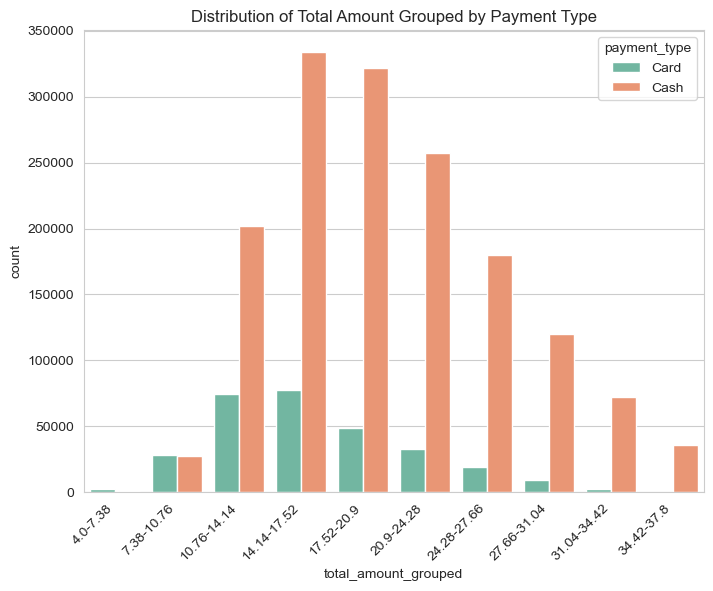

In [346]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="total_amount_grouped",hue="payment_type",palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Total Amount Grouped by Payment Type')

In [347]:
cross_tab = pd.crosstab(df['total_amount_grouped'], df['payment_type'], margins=True)
# cross_tab["%Card"]=cross_tab["Card"]/cross_tab["All"]
cross_tab["%Cash"]=cross_tab["Cash"]/cross_tab["All"]
print(cross_tab)

payment_type            Card     Cash      All     %Cash
total_amount_grouped                                    
4.0-7.38                2835      717     3552  0.201858
7.38-10.76             28624    27361    55985  0.488720
10.76-14.14            74460   202308   276768  0.730966
14.14-17.52            77816   333743   411559  0.810924
17.52-20.9             48601   321720   370321  0.868760
20.9-24.28             32683   257147   289830  0.887234
24.28-27.66            18902   180284   199186  0.905104
27.66-31.04             9372   120148   129520  0.927641
31.04-34.42             2180    72308    74488  0.970734
34.42-37.8               174    35691    35865  0.995148
All                   295647  1551427  1847074  0.839938


for total amount <10 , Cards are generally used 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '0.02-2.02'),
  Text(1, 0, '2.02-4.02'),
  Text(2, 0, '4.02-6.02'),
  Text(3, 0, '6.02-8.02'),
  Text(4, 0, '8.02-10.02'),
  Text(5, 0, '10.02-12.02'),
  Text(6, 0, '12.02-14.02'),
  Text(7, 0, '14.02-16.02'),
  Text(8, 0, '16.02-18.02'),
  Text(9, 0, '18.02-20.02'),
  Text(10, 0, '20.02-22.02'),
  Text(11, 0, '22.02-24.02'),
  Text(12, 0, '24.02-26.02'),
  Text(13, 0, '26.02-28.02')])

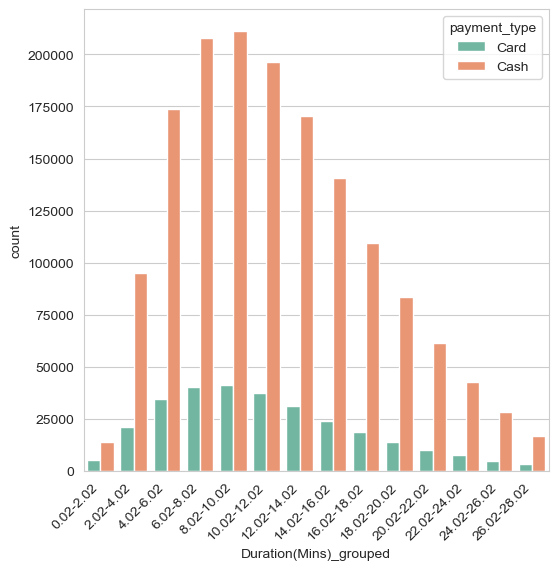

In [348]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="Duration(Mins)_grouped",hue="payment_type",palette="Set2")
plt.xticks(rotation=45, ha='right')

In [349]:
cross_tab = pd.crosstab(df['Duration(Mins)_grouped'], df['payment_type'], margins=True)
cross_tab["%Cash"]=cross_tab["Cash"]/cross_tab["All"]
print(cross_tab)

payment_type              Card     Cash      All     %Cash
Duration(Mins)_grouped                                    
0.02-2.02                 5497    13818    19315  0.715403
2.02-4.02                21209    95263   116472  0.817905
4.02-6.02                34746   173640   208386  0.833261
6.02-8.02                40595   207897   248492  0.836635
8.02-10.02               41565   211047   252612  0.835459
10.02-12.02              37685   196207   233892  0.838879
12.02-14.02              31265   170579   201844  0.845103
14.02-16.02              24185   140465   164650  0.853113
16.02-18.02              18606   109563   128169  0.854832
18.02-20.02              13844    83384    97228  0.857613
20.02-22.02              10364    61637    72001  0.856058
22.02-24.02               7680    42650    50330  0.847407
24.02-26.02               5053    28252    33305  0.848281
26.02-28.02               3335    16919    20254  0.835341
All                     295629  1551321  1846950  0.8399

1. for short duration : 0.02-2.02 : Lowest Cash Usage(0.71%)
2. for 14-22 mins ride Cash usage is Highest 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0-0.92'),
  Text(1, 0, '0.92-1.83'),
  Text(2, 0, '1.83-2.75'),
  Text(3, 0, '2.75-3.67'),
  Text(4, 0, '3.67-4.58'),
  Text(5, 0, '4.58-5.5'),
  Text(6, 0, '5.5-6.42'),
  Text(7, 0, '6.42-7.34'),
  Text(8, 0, '7.34-8.25'),
  Text(9, 0, '8.25-9.17'),
  Text(10, 0, '0')])

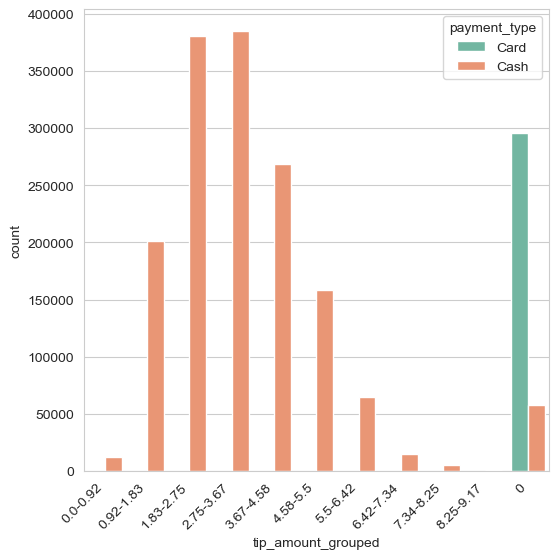

In [350]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="tip_amount_grouped",hue="payment_type", palette="Set2")
plt.xticks(rotation=45, ha='right')

In [351]:
cross_tab = pd.crosstab(df['tip_amount_grouped'], df['payment_type'], margins=True)
cross_tab["%Card"]=cross_tab["Card"]/cross_tab["All"]
print(cross_tab)

payment_type          Card     Cash      All     %Card
tip_amount_grouped                                    
0.0-0.92                 0    12531    12531  0.000000
0.92-1.83                1   201408   201409  0.000005
1.83-2.75                2   380297   380299  0.000005
2.75-3.67                5   384781   384786  0.000013
3.67-4.58                3   268690   268693  0.000011
4.58-5.5                 1   158482   158483  0.000006
5.5-6.42                 1    65153    65154  0.000015
6.42-7.34                0    14911    14911  0.000000
7.34-8.25                0     5812     5812  0.000000
8.25-9.17                0     1454     1454  0.000000
0                   295645    57908   353553  0.836211
All                 295658  1551427  1847085  0.160067


1. All the tip amounts are given when using cash 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '4.0-7.38'),
  Text(1, 0, '7.38-10.76'),
  Text(2, 0, '10.76-14.14'),
  Text(3, 0, '14.14-17.52'),
  Text(4, 0, '17.52-20.9'),
  Text(5, 0, '20.9-24.28'),
  Text(6, 0, '24.28-27.66'),
  Text(7, 0, '27.66-31.04'),
  Text(8, 0, '31.04-34.42'),
  Text(9, 0, '34.42-37.8')])

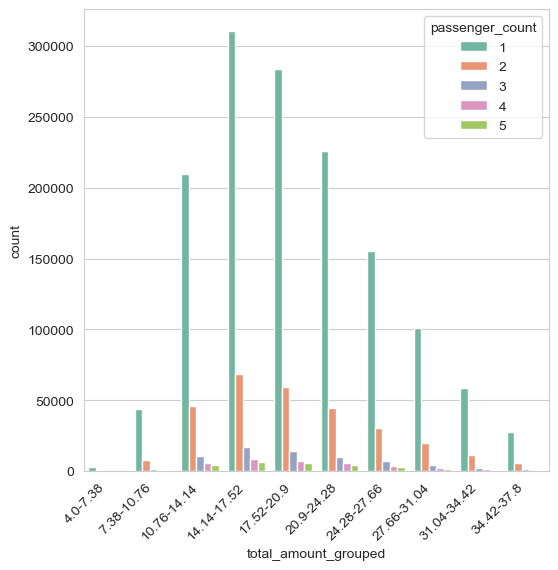

In [352]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="total_amount_grouped",hue="passenger_count", palette="Set2")
plt.xticks(rotation=45, ha='right')

In [353]:
cross_tab = pd.crosstab(df['passenger_count'], df['total_amount_grouped'], margins=True)
rowwise_percentage = cross_tab.div(cross_tab['All'], axis=0) * 100
# cross_tab["%"]=cross_tab[""]/cross_tab["All"]
print(rowwise_percentage)

total_amount_grouped  4.0-7.38  7.38-10.76  10.76-14.14  14.14-17.52  \
passenger_count                                                        
1                     0.208468    3.108913    14.759092    21.861726   
2                     0.145212    2.795153    15.567297    23.444855   
3                     0.103982    2.691969    15.948182    24.302818   
4                     0.114979    2.505482    15.944703    23.993262   
5                     0.187963    3.094162    16.634737    24.120730   
All                   0.192304    3.031010    14.984132    22.281674   

total_amount_grouped  17.52-20.9  20.9-24.28  24.28-27.66  27.66-31.04  \
passenger_count                                                          
1                      20.007848   15.889004    10.956860     7.130392   
2                      20.165664   15.096893    10.305933     6.712798   
3                      20.413616   14.737952    10.073220     6.420866   
4                      20.223007   15.278892    10.14

------No such Insight 

Text(0.5, 1.0, 'Correlation Heatmap of the Other Parameters')

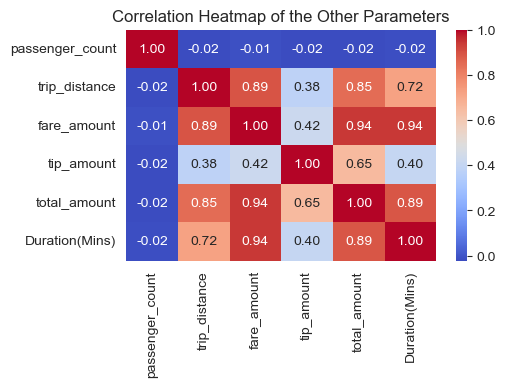

In [354]:
correlation_matrix = df_buffer.drop(columns=["index","VendorID","RatecodeID"]).corr()
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the Other Parameters')

1. Trip_distance and Fare  amount -> positive Correlation (0.89)
2. Trip_distance and Duration -> positive Correlation (0.72)
3. Duration and Fare  amount -> positive Correlation (0.94)
4. Passenger Count has very less effect on the other parameters 



In [355]:
df=df.drop(columns=["total_amount"])

In [356]:
df.head()

,VendorID,passenger_count,payment_type,trip_grouped,total_amount_grouped,fare_amount_grouped,Duration(Mins)_grouped,tip_amount_grouped
0,2,1,Card,1.62-2.15,20.9-24.28,16.8-19.5,18.02-20.02,0
1,1,1,Cash,1.62-2.15,17.52-20.9,8.7-11.4,6.02-8.02,3.67-4.58
2,1,1,Cash,4.29-4.82,31.04-34.42,22.1-24.8,16.02-18.02,2.75-3.67
3,1,1,Cash,1.08-1.62,14.14-17.52,8.7-11.4,8.02-10.02,1.83-2.75
4,1,1,Cash,0.55-1.08,14.14-17.52,6.1-8.7,6.02-8.02,2.75-3.67


In [357]:
df_grouped=df.copy()

In [358]:
df=df_grouped.copy()

In [359]:
df["payment_type"]=np.where(df["payment_type"]=="Card",0,1)
#Card is 0
#Cash = 1 

In [360]:
df.head()

,VendorID,passenger_count,payment_type,trip_grouped,total_amount_grouped,fare_amount_grouped,Duration(Mins)_grouped,tip_amount_grouped
0,2,1,0,1.62-2.15,20.9-24.28,16.8-19.5,18.02-20.02,0
1,1,1,1,1.62-2.15,17.52-20.9,8.7-11.4,6.02-8.02,3.67-4.58
2,1,1,1,4.29-4.82,31.04-34.42,22.1-24.8,16.02-18.02,2.75-3.67
3,1,1,1,1.08-1.62,14.14-17.52,8.7-11.4,8.02-10.02,1.83-2.75
4,1,1,1,0.55-1.08,14.14-17.52,6.1-8.7,6.02-8.02,2.75-3.67


In [361]:

df_dummy1=pd.get_dummies(df.drop(columns=["trip_grouped","total_amount_grouped","fare_amount_grouped","Duration(Mins)_grouped"]))
df_dummy1.head()

,payment_type,VendorID_1,VendorID_2,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,tip_amount_grouped_0.0-0.92,tip_amount_grouped_0.92-1.83,tip_amount_grouped_1.83-2.75,tip_amount_grouped_2.75-3.67,tip_amount_grouped_3.67-4.58,tip_amount_grouped_4.58-5.5,tip_amount_grouped_5.5-6.42,tip_amount_grouped_6.42-7.34,tip_amount_grouped_7.34-8.25,tip_amount_grouped_8.25-9.17,tip_amount_grouped_0
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<Axes: >

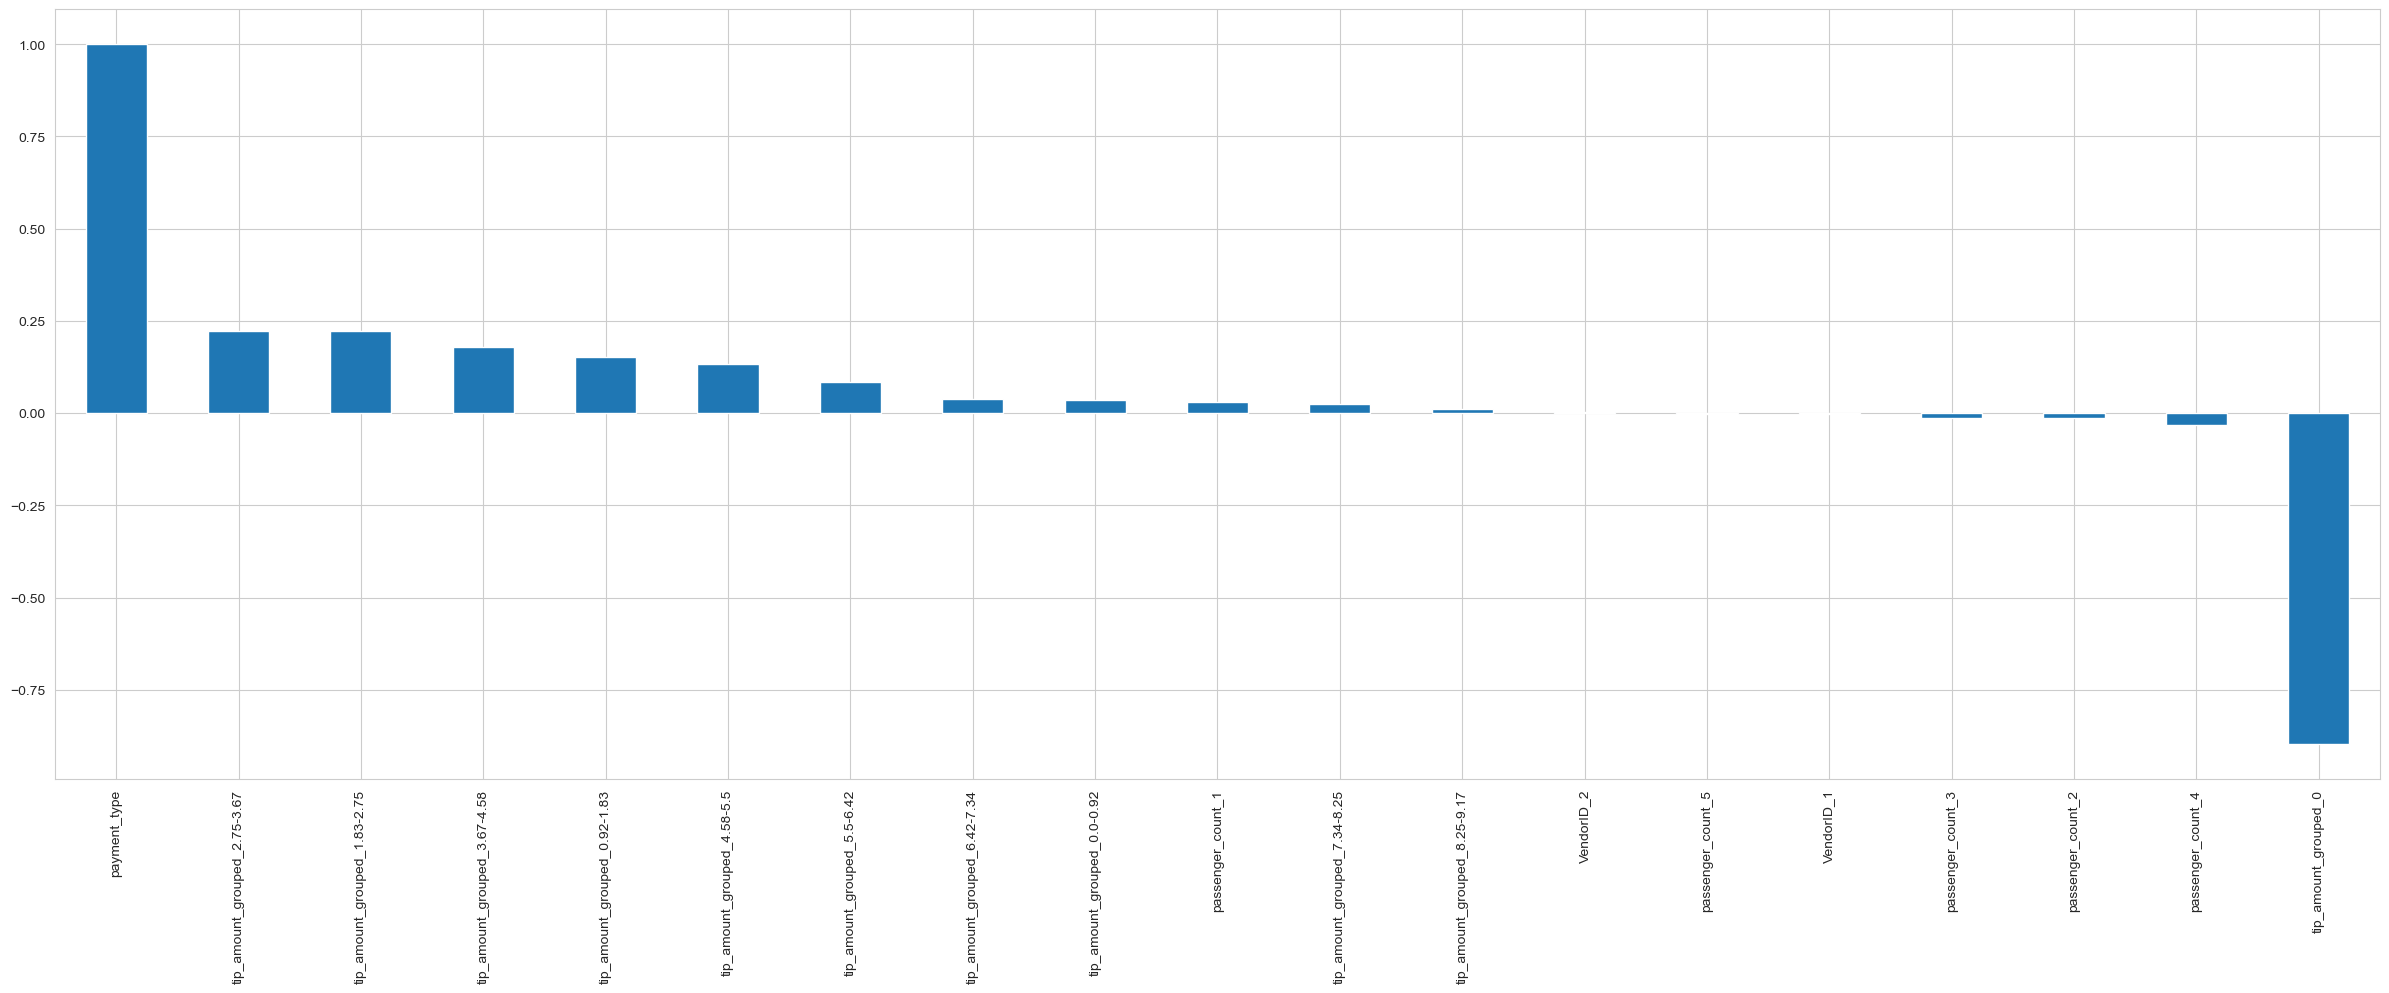

In [362]:
plt.figure(figsize=(30,10))
df_dummy1.corr()["payment_type"].sort_values(ascending=False).plot(kind='bar')

1. No relation with VendorID 
2. Positive Correlation with TIP amount 
3. Negatibe Correlation with Tip amount =0 
4. little positive correlation with passenger count = 1 
5. Negative Correlation with passenger count = 4 

In [363]:

df_dummy2=pd.get_dummies(df.drop(columns=['VendorID','passenger_count',"tip_amount_grouped",'total_amount_grouped']))
df_dummy2.head()

,payment_type,trip_grouped_0.01-0.55,trip_grouped_0.55-1.08,trip_grouped_1.08-1.62,trip_grouped_1.62-2.15,trip_grouped_2.15-2.68,trip_grouped_2.68-3.22,trip_grouped_3.22-3.76,trip_grouped_3.76-4.29,trip_grouped_4.29-4.82,...,Duration(Mins)_grouped_8.02-10.02,Duration(Mins)_grouped_10.02-12.02,Duration(Mins)_grouped_12.02-14.02,Duration(Mins)_grouped_14.02-16.02,Duration(Mins)_grouped_16.02-18.02,Duration(Mins)_grouped_18.02-20.02,Duration(Mins)_grouped_20.02-22.02,Duration(Mins)_grouped_22.02-24.02,Duration(Mins)_grouped_24.02-26.02,Duration(Mins)_grouped_26.02-28.02
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

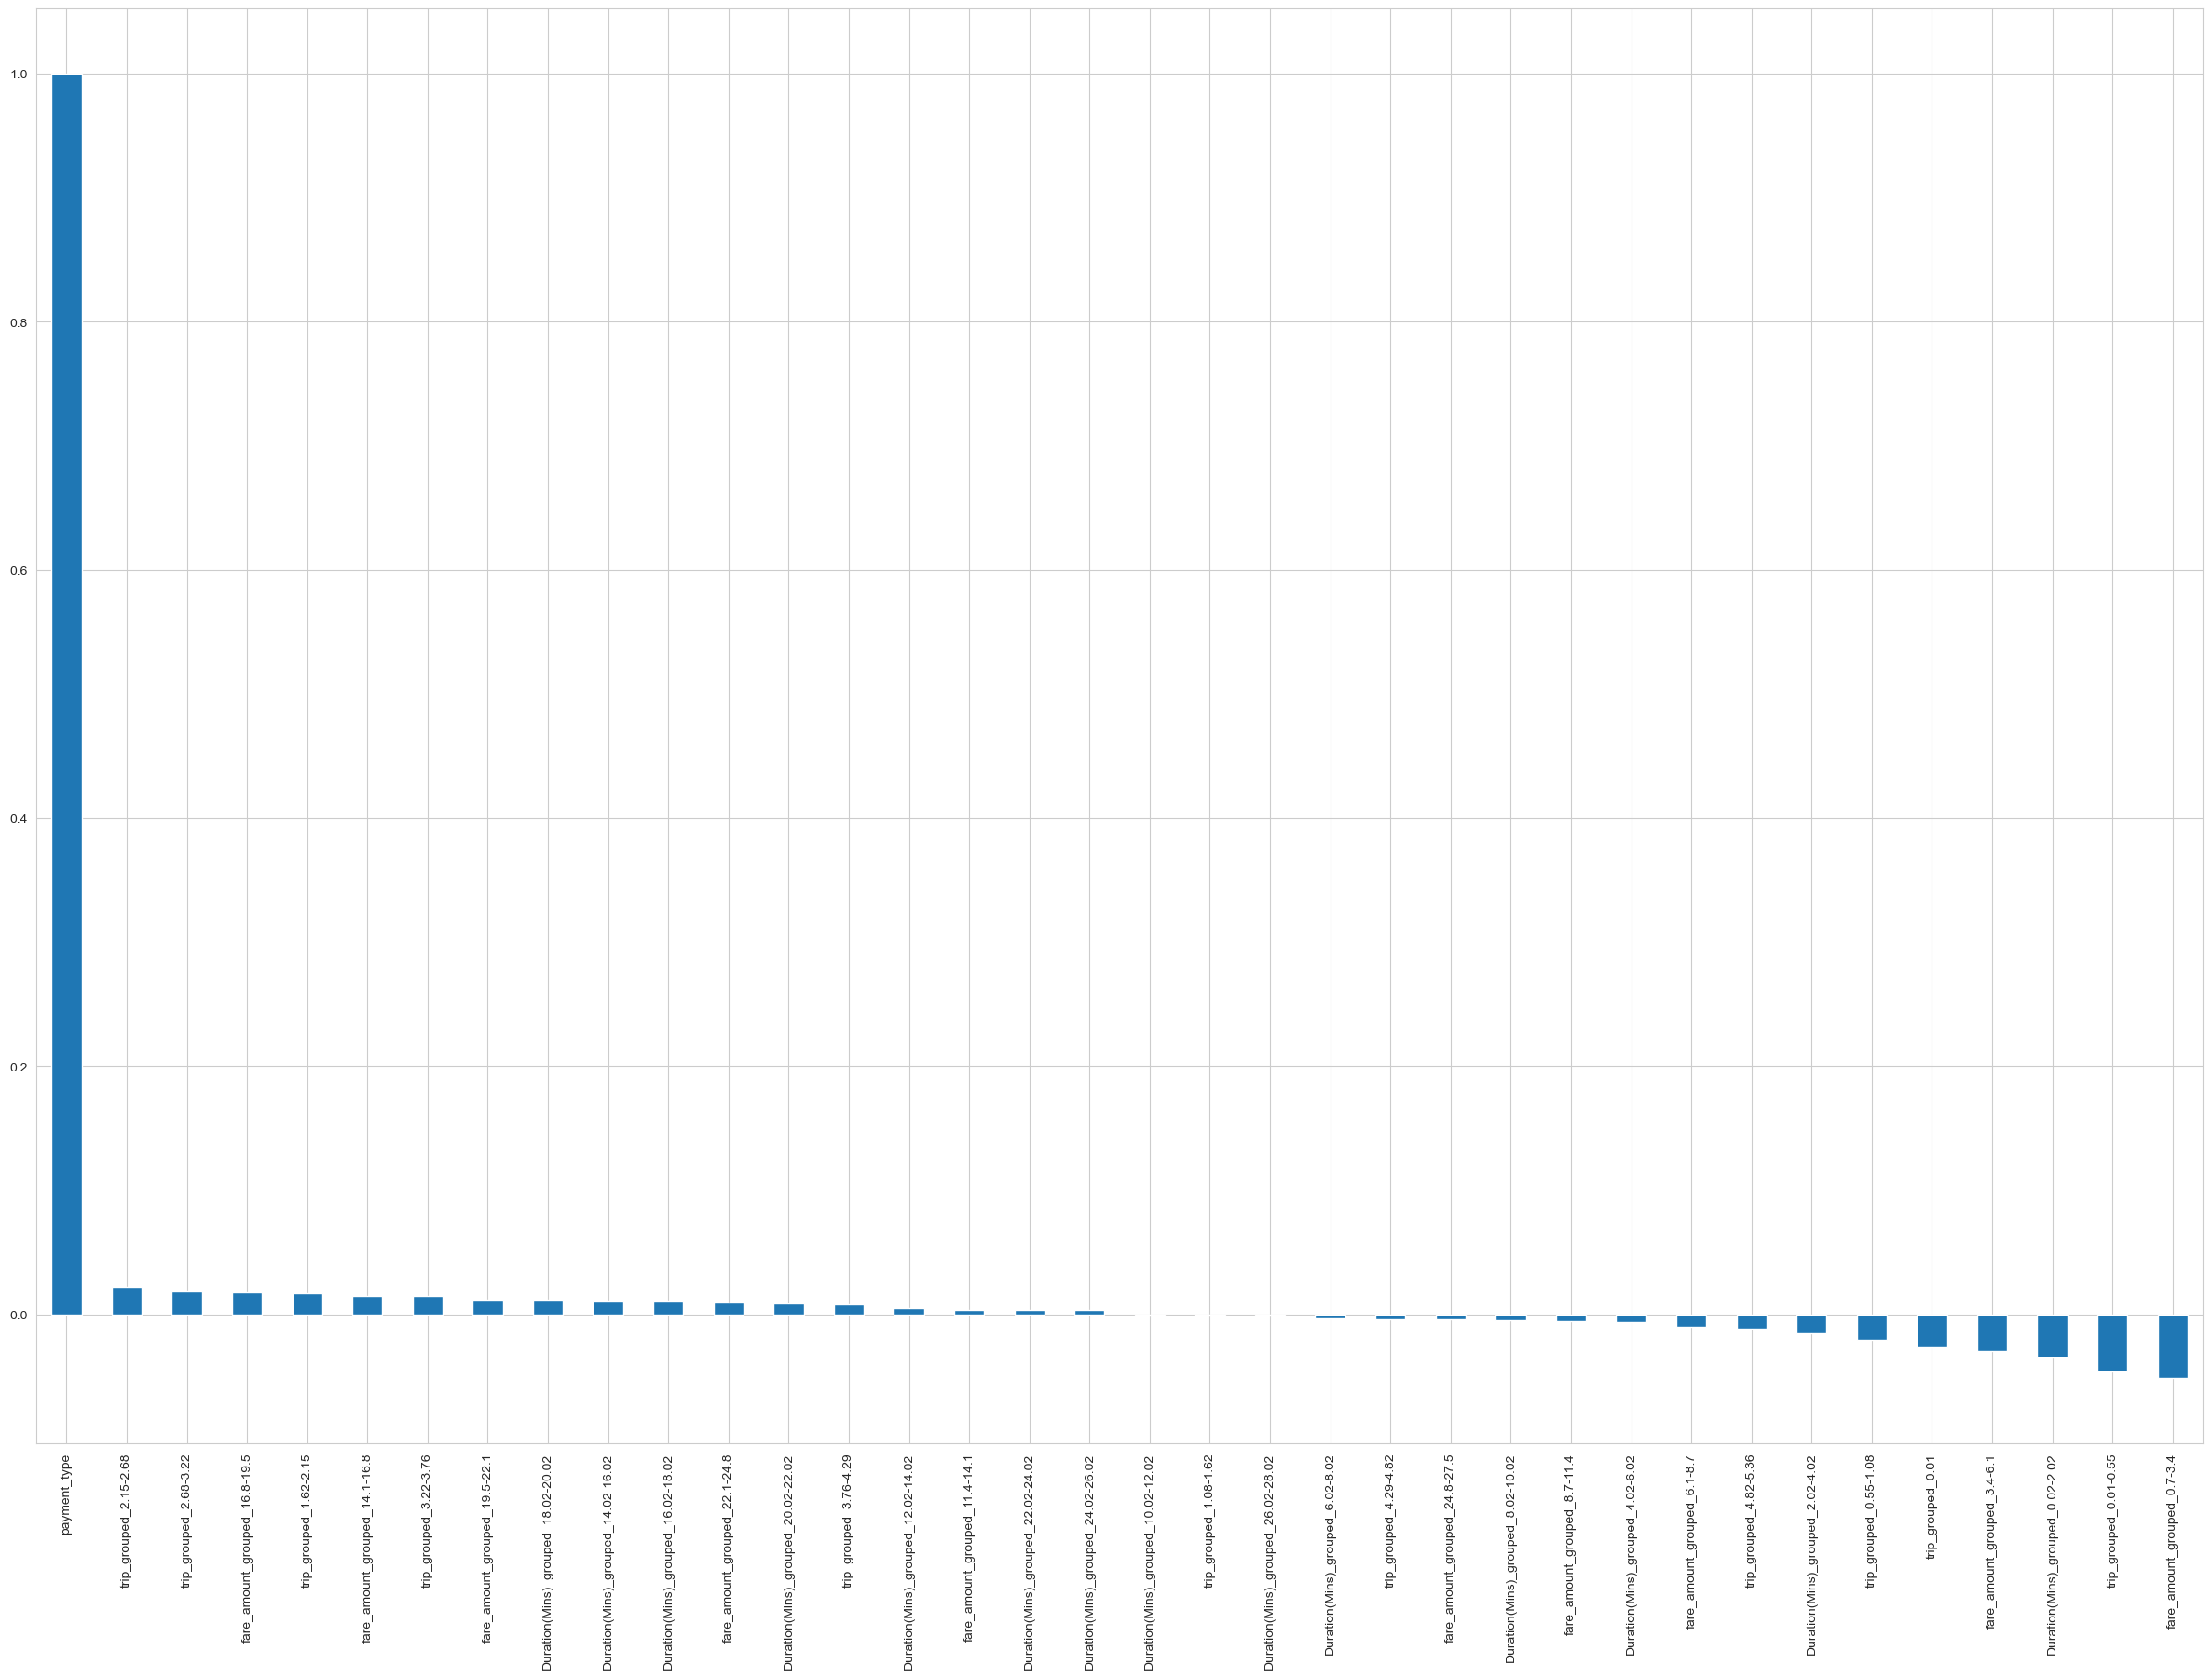

In [364]:
plt.figure(figsize=(30,20))
df_dummy2.corr()["payment_type"].sort_values(ascending=False).plot(kind='bar')

1. as earlier stated for low fair amount and duration and trip distance , it is negative correlation 
2. Represents the range of values of trip_distance, duration, fare amount for Cash and Card 

###### Summary: Data Overview  
1. The mean (total_amount) for Card is 16.774911, and Cash is 20.522621. So to maximize the revenue for Taxi Drivers Card usage    should be less 
2. Cash:Card=84:16
3. 76% times only 1 passenger travel, other 15% by only 2 passengers(more than 2 passengers < 10%)
4. most passengers travel around 0.5-2 km
5. Most passenger travel for 5-15 mins
6. fare amount and total amount has high positive correlation(0.943) . 
###### Summary: Analysis 
1. Vendor 2 Vendor 1 almost has almost same cash % . Vendor 1 is operating in small scale(Almost No reltion with VendorID)
2. Mostly 1 passenger travel (84.5 %cash percentage...so single passenger generally use Cash)
   If 3,4 passengers travel then around 80% using cash which is a little < than 1 passenger ....
   groups pay using Card......passenger count has very less effect on the other parameters 
3. Normally for very short distance(below 1), Card used (Cash Not used)....(so no to Short distance journeys)
   Mostly Cash is used for distances 2-4km.....(trip_distance range)
4.  Max Cash usage when fair amounts to 14-25...(fare_amount range)
5. for total amount <10 , Cards are generally used
6. for short duration : 0.02-2.02 : Lowest Cash Usage(0.71%)
   for 14-22 mins ride Cash usage is Highest....(Duration Range) 
7. All the tip amounts are given when using cash


###### Ideal situations for More Cash Usage
1. 2-4km.....(trip_distance range)
2. 14-25...(fare_amount range)
3. 14-22 mins....(Duration Range range)
4. single passenger 
5. Tip when receiving fare in cash 
 
#####  Situations for Card Usage(AVOIDING criteria)
1. very short distance(below 1), Card used
2. total amount <10 , Cards are generally used
3. for short duration : 0.02-2.02 : Lowest Cash Usage(0.71%)
3. Group of 4 passengers travel 

###### Last thoughts : 
1. As less amount generated from Card , it means there may be less benifit for the Taxi Drivers when travellers are using Card
2. Also when using card , Tip amount is missed 
3. Avoiding Short Distance from the Taxi Drivers can resolve the situation for them 
4. There should be a minimun barrier for Payment 
5. Trying to get more passengers for 2-4 km range 

### Hypothesis Testing 


##### Null Hypothesis:  
There is no difference in average fare_amount between passengers who use Cash and who use Cards 

##### Alternate Hypothesis:  
There is difference in average fare_amount between passengers who use Cash and who use Cards 

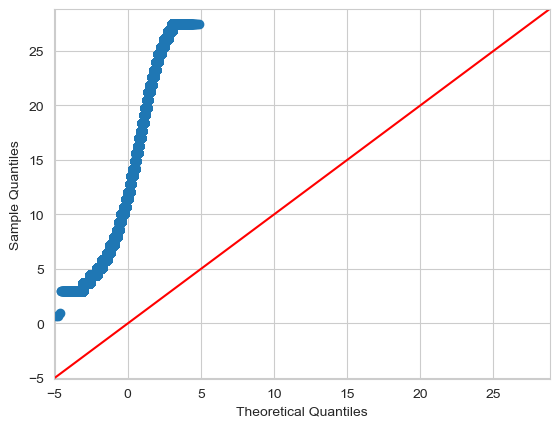

In [365]:
df_new=df_buffer.copy()
import statsmodels.api as sm
sm.qqplot(df_new["fare_amount"],line='45')
plt.show()

--- as data not normally distributed , we cannot use z-test 
So have to use T-test 

In [368]:
card_sample=df_new[df_new["payment_type"]=="Card"]['fare_amount']
cash_sample=df_new[df_new["payment_type"]=="Cash"]['fare_amount']

In [369]:
t_stats,p_value = st.ttest_ind(a=card_sample,b= cash_sample,equal_var=False)
print('T statistic',t_stats,"p-Value",p_value)

T statistic -48.237915938332655 p-Value 0.0


###### Inference: rejecting the null hypothesis in favor of an alternative hypothesis


There is difference in average fare_amount between passengers who use Cash and who use Cards 